In [1]:
# 黄金ETF 518880
import akshare as ak

fund_etf_fund_info_em_df = ak.fund_etf_fund_info_em(fund="518880")
spot_golden_benchmark_sge_df = ak.spot_golden_benchmark_sge()
print(fund_etf_fund_info_em_df)
print(spot_golden_benchmark_sge_df)

            净值日期    单位净值    累计净值  日增长率  申购状态  赎回状态
0     2013-07-18  1.0000  1.0000   NaN  场内买入  场内卖出
1     2013-07-19  1.0010  1.0010  0.10  场内买入  场内卖出
2     2013-07-22  1.0060  1.0060  0.50  场内买入  场内卖出
3     2013-07-24  2.6870  1.0150  0.86  场内买入  场内卖出
4     2013-07-26  2.6650  1.0060 -0.82  场内买入  场内卖出
...          ...     ...     ...   ...   ...   ...
2365  2023-03-30  4.2431  1.6023  0.04  场内买入  场内卖出
2366  2023-03-31  4.2775  1.6152  0.81  场内买入  场内卖出
2367  2023-04-03  4.2273  1.5963 -1.17  场内买入  场内卖出
2368  2023-04-04  4.2655  1.6107  0.90  场内买入  场内卖出
2369  2023-04-06  4.3351  1.6370  1.63  场内买入  场内卖出

[2370 rows x 6 columns]
            交易时间     晚盘价     早盘价
0     2016-04-18  257.29  256.92
1     2016-04-19  259.97  261.15
2     2016-04-20  261.82  260.39
3     2016-04-21  260.41  261.32
4     2016-04-24  258.80  258.42
...          ...     ...     ...
1689  2023-03-28  436.99  437.93
1690  2023-03-29  437.66  437.08
1691  2023-03-30  440.01  439.01
1692  2023-04-02  434.87  436.16


In [4]:
import pandas as pd
merge_df = pd.merge(fund_etf_fund_info_em_df, spot_golden_benchmark_sge_df, left_on='净值日期', right_on='交易时间')
merge_df

,净值日期,单位净值,累计净值,日增长率,申购状态,赎回状态,交易时间,晚盘价,早盘价
0,2016-04-18,2.5833,0.9755,0.52,场内买入,场内卖出,2016-04-18,257.29,256.92
1,2016-04-19,2.5995,0.9816,0.63,场内买入,场内卖出,2016-04-19,259.97,261.15
2,2016-04-20,2.6005,0.9820,0.04,场内买入,场内卖出,2016-04-20,261.82,260.39
3,2016-04-21,2.6278,0.9923,1.05,场内买入,场内卖出,2016-04-21,260.41,261.32
4,2016-04-25,2.5908,0.9783,-0.54,场内买入,场内卖出,2016-04-25,258.53,259.23
...,...,...,...,...,...,...,...,...,...
1334,2023-03-27,4.2436,1.6024,-0.56,场内买入,场内卖出,2023-03-27,435.12,436.02
1335,2023-03-28,4.2298,1.5972,-0.33,场内买入,场内卖出,2023-03-28,436.99,437.93
1336,2023-03-29,4.2414,1.6016,0.27,场内买入,场内卖出,2023-03-29,437.66,437.08
1337,2023-03-30,4.2431,1.6023,0.04,场内买入,场内卖出,2023-03-30,440.01,439.01


In [8]:
return_df = merge_df.set_index('净值日期')
return_df = return_df[['累计净值','晚盘价']]
return_df.columns = ['etf','golden']
return_df['etf'] = return_df['etf'] / list(return_df['etf'].head(1))[0]
return_df['golden'] = return_df['golden'] / list(return_df['golden'].head(1))[0]
return_df

,etf,golden
净值日期,,
2016-04-18,1.000000,1.000000
2016-04-19,1.006253,1.010416
2016-04-20,1.006663,1.017607
2016-04-21,1.017222,1.012126
2016-04-25,1.002870,1.004819
...,...,...
2023-03-27,1.642645,1.691166
2023-03-28,1.637314,1.698434
2023-03-29,1.641825,1.701038


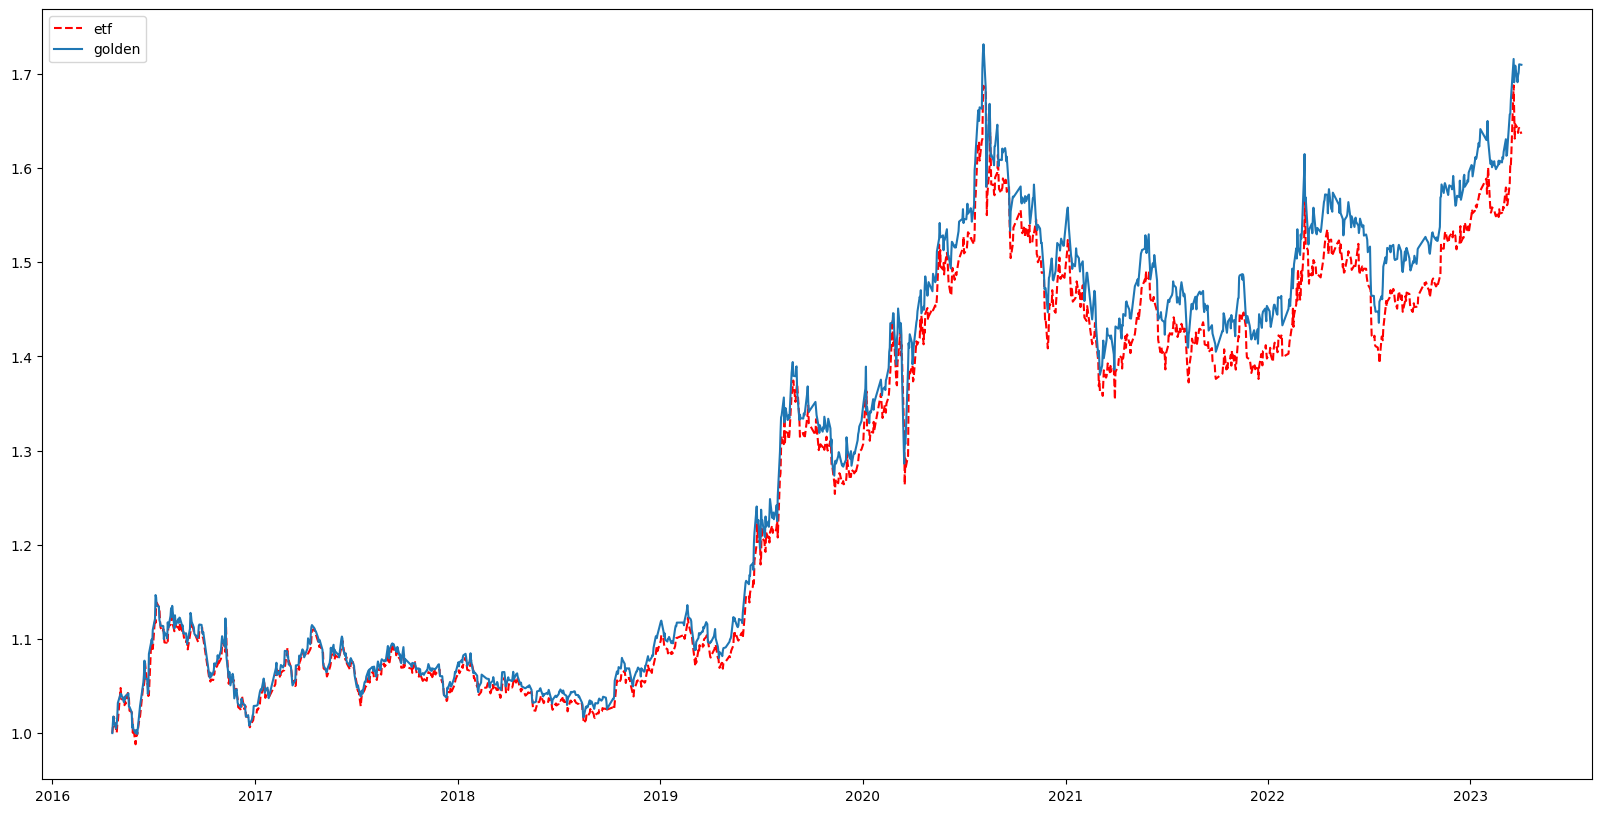

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10), dpi=100)
plt.plot(return_df['etf'],'r--',label='etf')
plt.plot(return_df['golden'],label='golden')
plt.legend()
plt.show()

In [10]:
return_df.corr()

,etf,golden
etf,1.000000,0.998424
golden,0.998424,1.000000


In [40]:
'''
黄金股研究
山东黄金 600547
中金黄金 600489
银泰黄金 000975
赤峰黄金 600988
紫金矿业 601899
'''
stocks = [
    '600547',
    '600489',
    '000975',
    '600988',
    # '601899',
]
stock_merge_df = None
for s in stocks:
    tock_zh_a_hist_df = ak.stock_zh_a_hist(symbol=s, period="daily",adjust='hfq')
    # print(tock_zh_a_hist_df)
    tock_zh_a_hist_df = tock_zh_a_hist_df.set_index('日期')['收盘']
    # tock_zh_a_hist_df = tock_zh_a_hist_df / list(tock_zh_a_hist_df.head(1))[0]
    # print(tock_zh_a_hist_df)
    if stock_merge_df is None:
        stock_merge_df = tock_zh_a_hist_df
    else:
        stock_merge_df = pd.merge(stock_merge_df, tock_zh_a_hist_df, left_index=True, right_index=True)
    # stock_dfs[s] = tock_zh_a_hist_df

stock_merge_df.columns = stocks
stock_merge_df



/var/folders/df/l69p20dn6njghq9h4zrpxdwr0000gn/T/ipykernel_88677/1429353965.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'收盘_x'} in the result is deprecated and will raise a MergeError in a future version.
  stock_merge_df = pd.merge(stock_merge_df, tock_zh_a_hist_df, left_index=True, right_index=True)


,600547,600489,000975,600988
日期,,,,
2004-04-14,14.50,9.68,16.31,16.18
2004-04-15,14.35,9.60,16.10,15.09
2004-04-16,14.16,9.46,16.00,14.97
2004-04-19,13.71,9.21,15.57,15.10
2004-04-20,13.87,9.29,15.32,14.69
...,...,...,...,...
2023-03-30,348.57,89.25,120.09,104.96
2023-03-31,359.55,95.82,124.19,98.91
2023-04-03,352.80,92.90,121.85,98.10


In [41]:
temp = fund_etf_fund_info_em_df.set_index('净值日期')
temp = temp['累计净值']
stock_merge_df.index = pd.to_datetime(stock_merge_df.index)
temp.index = pd.to_datetime(temp.index)
# print(temp)
stock_merge_df = pd.merge(stock_merge_df, temp, left_index=True, right_index=True)
stock_merge_df
for s in stocks:
    stock_merge_df[s] = stock_merge_df[s] / list(stock_merge_df[s].head(1))[0]
stock_merge_df['累计净值'] = stock_merge_df['累计净值'] / list(stock_merge_df['累计净值'].head(1))[0]
stock_merge_df


,600547,600489,000975,600988,累计净值
2013-07-18,1.000000,1.000000,1.000000,1.000000,1.0000
2013-07-19,0.984642,0.988535,0.967454,0.967381,1.0010
2013-07-22,1.031167,1.028190,0.981102,1.055015,1.0060
2013-07-24,1.028909,1.028190,0.996588,1.048199,1.0150
2013-07-26,1.015809,1.017669,0.971916,1.037975,1.0060
...,...,...,...,...,...
2023-03-30,1.968099,1.203804,3.151969,5.110029,1.6023
2023-03-31,2.030094,1.292420,3.259580,4.815482,1.6152
2023-04-03,1.991982,1.253035,3.198163,4.776047,1.5963
2023-04-04,2.093784,1.336660,3.312598,4.900682,1.6107


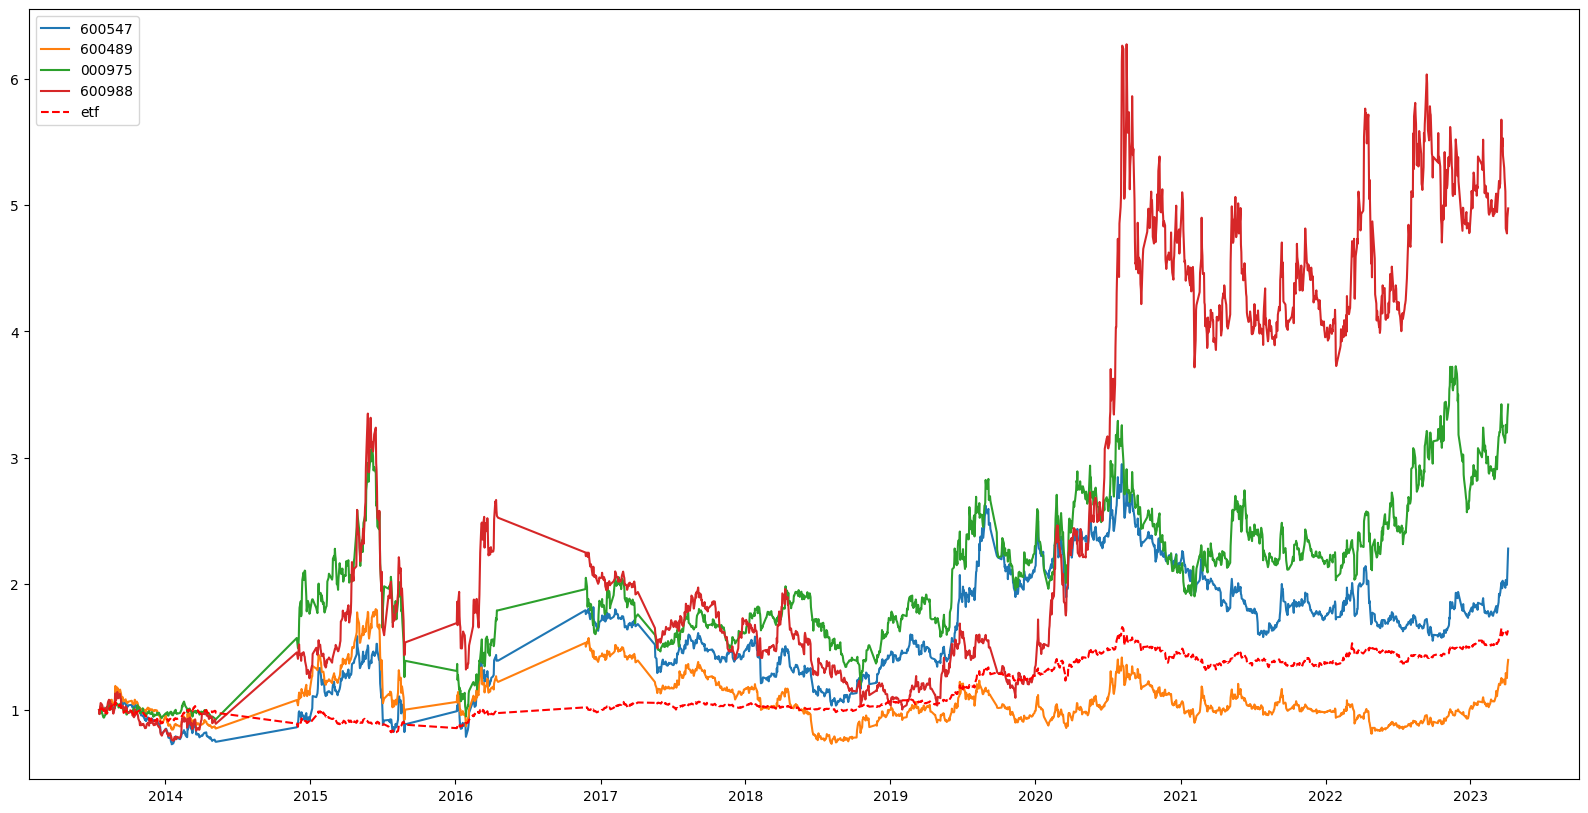

In [42]:
plt.figure(figsize=(20, 10), dpi=100)
for s in stocks:
    plt.plot(stock_merge_df[s],label=s)
plt.plot(stock_merge_df['累计净值'],'r--',label='etf')
plt.legend()
plt.show()

In [43]:


stock_merge_df.corr()

,600547,600489,000975,600988,累计净值
600547,1.000000,0.135314,0.744362,0.584738,0.813083
600489,0.135314,1.000000,0.140837,-0.005733,-0.223513
000975,0.744362,0.140837,1.000000,0.757315,0.769798
600988,0.584738,-0.005733,0.757315,1.000000,0.841547
累计净值,0.813083,-0.223513,0.769798,0.841547,1.000000


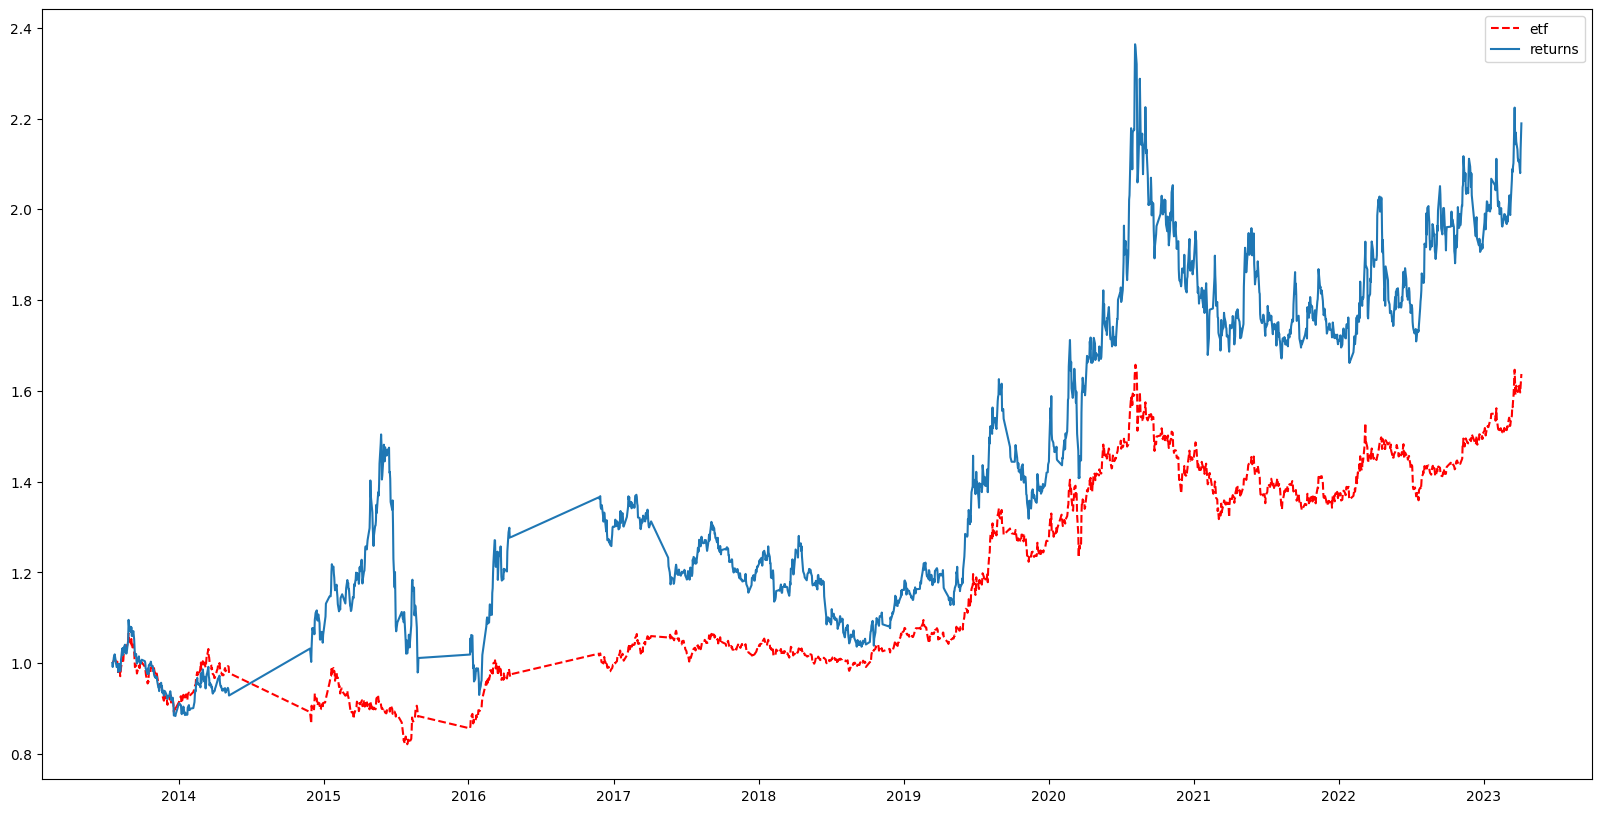

In [44]:
# stock_merge_df['600547'] = stock_merge_df['600547'] * 0.1
# stock_merge_df['600489'] = stock_merge_df['600489'] * 0.1
# stock_merge_df['000975'] = stock_merge_df['000975'] * 0.1
# stock_merge_df['600988'] = stock_merge_df['600988'] * 0.1
# stock_merge_df['累计净值'] = stock_merge_df['累计净值'] * 0.6
returns = stock_merge_df['600547'] * 0.1 + stock_merge_df['600489'] * 0.1 + stock_merge_df['000975'] * 0.1 + stock_merge_df['600988'] * 0.1 + stock_merge_df['累计净值'] * 0.6
plt.figure(figsize=(20, 10), dpi=100)
plt.plot(stock_merge_df['累计净值'],label='etf')
plt.plot(returns,label='returns')
plt.plot(returns - stock_merge_df['累计净值'], label='add')
plt.legend()
plt.show()